### 0. 사용할 패키지 불러오기

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

Using TensorFlow backend.


### 1. 데이터셋 생성하기

In [2]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2 

### 2. 모델 구성하기

In [3]:
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 332,801
Trainable params: 332,801
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [4]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기

In [5]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 249us/step - loss: 0.2924 - acc: 0.8847 - val_loss: 0.1494 - val_acc: 0.9456
Epoch 2/30
50000/50000 [==============================] - 6s 115us/step - loss: 0.1270 - acc: 0.9550 - val_loss: 0.0994 - val_acc: 0.9672
Epoch 3/30
50000/50000 [==============================] - 6s 110us/step - loss: 0.0898 - acc: 0.9679 - val_loss: 0.0832 - val_acc: 0.9728
Epoch 4/30
50000/50000 [==============================] - 5s 108us/step - loss: 0.0722 - acc: 0.9750 - val_loss: 0.0725 - val_acc: 0.9760
Epoch 5/30
50000/50000 [==============================] - 6s 111us/step - loss: 0.0605 - acc: 0.9794 - val_loss: 0.0674 - val_acc: 0.9760
Epoch 6/30
50000/50000 [==============================] - 5s 107us/step - loss: 0.0522 - acc: 0.9820 - val_loss: 0.0677 - val_acc: 0.9771
Epoch 7/30
50000/50000 [==============================] - 6s 110us/step - loss: 0.0462 - acc: 0.9839 - val_loss: 0.0621 -

### 5. 학습과정 살펴보기

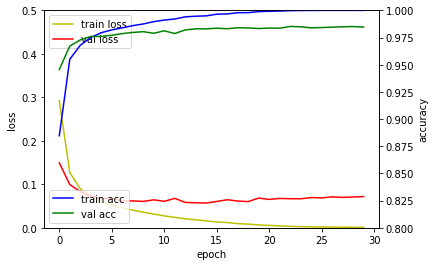

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [7]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 38us/step
## evaluation loss and metrics ##
[0.06185988411523868, 0.9844]


### 7. 모델 사용하기

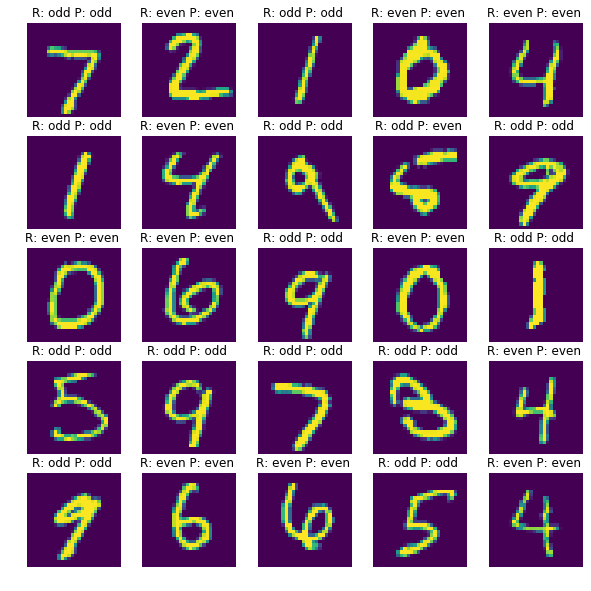

In [29]:
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt.set_title(sub_plt_title)
    
plt.show()